# Pandas
Package Python yang digunakan untuk import, explore, edit data.

Ada 2 data struktur dari pandas:
- Series
- DataFrame

## Series
tipe data 1 dimensi, mirip numpy array 1 dimensi

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [3]:
pd.Series(["a","b","c"])

0    a
1    b
2    c
dtype: object

selain boleh dimasukin data non numerik, seris juga punya judul index. tidak harus menggunakan angka index seperti numpy array, tidak harus menggunakan key seperti dictionary, dia secara default memberi index angka urut 0,1,2,... yang bisa diganti menjadi string apapun

mirip dictionary

In [4]:
# contoh: kita buat series tentang sebuah kota, nama dan jumlah populasi (jutaan)
pd.Series(["Jakarta", 15], index=["Kota", "Populasi"])

Kota        Jakarta
Populasi         15
dtype: object

In [5]:
# cara lain membuat Series, bisa juga pakai dictionary
kota_a = pd.Series({"Kota":"Jakarta", "Populasi":15})

In [6]:
kota_a

Kota        Jakarta
Populasi         15
dtype: object

kita sudah bisa membuat Series, mari kita buat beberapa Series lagi

In [7]:
kota_b = pd.Series({"Kota":"Semarang", "Populasi":7})
kota_c = pd.Series({"Kota":"Surabaya", "Populasi":12})
kota_d = pd.Series({"Kota":"Bali", "Populasi":5})

In [8]:
kota_d

Kota        Bali
Populasi       5
dtype: object

In [9]:
kota_d["Kota"]

'Bali'

In [10]:
kota_d["Kota"] = "Bandung"
print(kota_d)

Kota        Bandung
Populasi          5
dtype: object


cara baca satu value di Series, dan cara ganti satu value di Series mirip sekali dengan dictionary. ambil Series nya, berikan index/key nya dengan ["key"] dan kita bisa akses value yang cocok

In [11]:
# cara nambah value, pasangan key:value, index:value ke sebuah Series juga sama seperti dictionary
kota_d["Timezone"] = "WIB"
print(kota_d)

Kota        Bandung
Populasi          5
Timezone        WIB
dtype: object


beberapa Series bisa kita gabungkan menjadi sebuah DataFrame

DataFrame adalah data struktur 2 dimensi milik Pandas. mirip excel, ada judul kolom, ada judul baris (index), kotak2 value nya yang cocok dengan 1 baris dan 1 kolom tertentu, value bisa numerik, bisa non numerik, bisa kosong juga.

Series yang 1 dimensi, bisa kita susun menjadi sebuah DataFrame

In [12]:
# beberapa series dimasukkan kedalam sebuah list, bisa kita convert jadi DataFrame
df_kota = pd.DataFrame([kota_a, kota_b, kota_c, kota_d])
df_kota

,Kota,Populasi,Timezone
0,Jakarta,15,NaN
1,Semarang,7,NaN
2,Surabaya,12,NaN
3,Bandung,5,WIB


In [13]:
# kalau mau ambil Jakarta, kita perlu gunakan conditional, query, untuk cari data kolom "Kota" yang value "Jakarta"
kondisi = (df_kota["Kota"] == "Jakarta")

df_kota[kondisi]

,Kota,Populasi,Timezone
0,Jakarta,15,NaN


In [14]:
# kalau kita gunakan kolom "Kota" sebagai index dari dataframe nya, kita punya cara mudah untuk ambil data kota Jakarta
# 1. kita ubah kolom "Kota" jadi index dataframe
df_kota = df_kota.set_index("Kota")
df_kota

,Populasi,Timezone
Kota,,
Jakarta,15,NaN
Semarang,7,NaN
Surabaya,12,NaN
Bandung,5,WIB


In [15]:
# 2. kita pakai ".loc" untuk ambil baris dengan index tertentu
# tanpa ".loc" DataFrame akan cari dari judul kolomnya, bukan judul baris
df_kota.loc["Jakarta"]

Populasi     15
Timezone    NaN
Name: Jakarta, dtype: object

perhatikan data yang kita dapat berbentuk Series, kalau mau dapat hasilnya tetap DataFrame, kita perlu ambil data 2 dimensi

In [16]:
df_kota.loc[["Jakarta"]]

,Populasi,Timezone
Kota,,
Jakarta,15,NaN


In [17]:
# ambil dari baris DAN kolom tertentu, tetap pakai .loc
df_kota.loc["Jakarta", "Populasi"] # baris Jakarta, kolom Populasi

15

Selain dari beberapa series kita gabungkan, DataFrame juga bisa kita buat dari list

In [18]:
df_penjualan = pd.DataFrame({
    "pemasukan": [50000, 100000, 75000],
    "pengeluaran": [5000, 7000, 5000],
    "hari": ["senin", "selasa", "rabu"]
})

df_penjualan

,pemasukan,pengeluaran,hari
0,50000,5000,senin
1,100000,7000,selasa
2,75000,5000,rabu


In [19]:
df_penjualan.set_index("hari")

,pemasukan,pengeluaran
hari,,
senin,50000,5000
selasa,100000,7000
rabu,75000,5000


In [20]:
df_penjualan = pd.DataFrame({
    "pemasukan": [50000, 100000, 75000],
    "pengeluaran": [5000, 7000, 5000],
}, index=["senin", "selasa", "rabu"])

df_penjualan

,pemasukan,pengeluaran
senin,50000,5000
selasa,100000,7000
rabu,75000,5000


In [21]:
df_penjualan.index.name = "hari"
df_penjualan

,pemasukan,pengeluaran
hari,,
senin,50000,5000
selasa,100000,7000
rabu,75000,5000


dalam membuat kolom sebagai judul baris (index) pastikan index nya unik, jadi kita tidak bingung

Series adalah tipe data 1 dimensi, punya index (judul baris), tidak punya judul kolom. Untuk akses datanya kita gunakan key, mirip seperti dictionary.

DataFrame adalah tipe data 2 dimensi, punya index (judul baris), punya judul kolom. Untuk akses data ada beberapa cara:
- data kolom tertentu, kita langsung `["judul_kolom"]` untuk dapat data 1 kolom tertentu
- data baris tertentu, kita gunakan `.loc["judul_baris"]` untuk dapat data baris tertentu
- teknik query, membuat kondisi, bisa 1 bisa lebih dari 1 kondisi, untuk mengambil data tertentu. kondisinya kita masukkan sebagai index `[kondisi1]` atau `[kondisi1 & kondisi2]` atau `[kondisi1 | kondisi2]` dan kombinasi lainnya.
- indexing/slicing, kita bisa ambil data di kolom dan baris tertentu pakai `.loc["judul_baris", "judul_kolom"]`

In [22]:
toys = pd.DataFrame([
    {"name": "ball", "shape": "sphere", "price":15},
    {"name": "Rubik's cube", "shape": "cube", "price":30},
    {"name": "pringles", "shape":"cylinder", "price":27}
])

toys

,name,shape,price
0,ball,sphere,15
1,Rubik's cube,cube,30
2,pringles,cylinder,27


latihan pendek - sampai jam 20.00 WIB lalu kita bahas

buatlah dataframe diatas, lalu coba ambil:
1. data kolom shape
2. data di baris terakhir
3. khusus data yang price nya diatas 20
4. ambil kolom `shape` dan `price` di baris `ball` dan `pringles` saja, boleh set index ke kolom name sebelum mengambil data

In [23]:
# data kolom shape, Series
toys["shape"]

0      sphere
1        cube
2    cylinder
Name: shape, dtype: object

In [24]:
# data kolom shape, DataFrame
toys[["shape"]]

,shape
0,sphere
1,cube
2,cylinder


In [25]:
# data di baris terakhir, Series
toys.loc[2]

name     pringles
shape    cylinder
price          27
Name: 2, dtype: object

In [26]:
toys.loc[[2]]

,name,shape,price
2,pringles,cylinder,27


In [27]:
# bisa juga menggunakan iloc, dimana dia menganggap setiap baris punya angka urut index
# jadi mirip dengan index di list atau numpy array, bisa pakai -1 untuk akses baris terakhir
toys.iloc[-1]

name     pringles
shape    cylinder
price          27
Name: 2, dtype: object

kalau .loc menggunakan judul barisnya, kalau .iloc menggunakan posisi barisnya, angka

In [28]:
toys.iloc[[-1]]

,name,shape,price
2,pringles,cylinder,27


In [29]:
# khusus data yang kolom price nya punya value di atas 20
kondisi = (toys["price"] > 20)

toys[kondisi]

,name,shape,price
1,Rubik's cube,cube,30
2,pringles,cylinder,27


In [30]:
# kolom ["shape", "price"] baris ["ball", "pringles"]

# cara 1, kita pakai kondisi untuk ambil value ["ball", "pringles"] di kolom "name"
kondisi1 = (toys["name"] == "ball")
kondisi2 = (toys["name"] == "pringles")

bp = toys[kondisi1 | kondisi2]
bp

,name,shape,price
0,ball,sphere,15
2,pringles,cylinder,27


In [31]:
# sudah di filter baris2 yg kita mau, skr kita ambil kolom tertentu
bp[["shape", "price"]]

,shape,price
0,sphere,15
2,cylinder,27


In [32]:
# cara 2, karena kolom name value nya unik, kt gunakan saja sebagai index, judul baris
toys2 = toys.set_index("name")
toys2

,shape,price
name,,
ball,sphere,15
Rubik's cube,cube,30
pringles,cylinder,27


In [33]:
# baru kita ambil ball pringles dari index, kolom shape dan price
toys2.loc[["ball", "pringles"], ["shape", "price"]]

,shape,price
name,,
ball,sphere,15
pringles,cylinder,27


In [34]:
# untuk ubah isi data, misal ball jadi harga 20

toys2

,shape,price
name,,
ball,sphere,15
Rubik's cube,cube,30
pringles,cylinder,27


In [35]:
toys2.loc["ball", "price"] = 20

In [36]:
toys2

,shape,price
name,,
ball,sphere,20
Rubik's cube,cube,30
pringles,cylinder,27


In [37]:
toys

,name,shape,price
0,ball,sphere,15
1,Rubik's cube,cube,30
2,pringles,cylinder,27


In [38]:
kondisi = toys["name"] == "ball"

toys[kondisi]

,name,shape,price
0,ball,sphere,15


In [39]:
toys[(toys["name"] == "ball")]

,name,shape,price
0,ball,sphere,15


In [40]:
toys.loc[0, "price"] = 20

In [41]:
toys

,name,shape,price
0,ball,sphere,20
1,Rubik's cube,cube,30
2,pringles,cylinder,27


menggabungkan dua table, bisa pakai concat

In [42]:
toys

,name,shape,price
0,ball,sphere,20
1,Rubik's cube,cube,30
2,pringles,cylinder,27


In [43]:
toys3 = pd.DataFrame([
    {"name":"box", "shape":"cube", "price":12},
    {"name":"pyramid", "shape":"pyramid", "price":13},
    {"name":"prism", "shape":"prism", "price":9},
    ])
toys3

,name,shape,price
0,box,cube,12
1,pyramid,pyramid,13
2,prism,prism,9


In [44]:
pd.concat([toys, toys3])

,name,shape,price
0,ball,sphere,20
1,Rubik's cube,cube,30
2,pringles,cylinder,27
0,box,cube,12
1,pyramid,pyramid,13
2,prism,prism,9


# Case Study: NBA
kita akan gunakan data csv nbaallelo.csv, ini adalah data permainan basket NBA dari tahun 1946-2015

kita gunakan pandas untuk import datanya dari csv menjadi DataFrame

lalu kita terapkan beberapa teknik pandas untuk melihat info tentang data nya:
- .info() summary data, jumlah kolom, jumlah baris, tipe data
- .head() beberapa baris pertama data
- query, untuk mengambil data tim tertentu
- aggregate, untuk membuat summary misalnya jumlah game yang dimenangkan sebuah tim
- plot, untuk membuat visualisasi datanya

In [45]:
df_nba = pd.read_csv("nbaallelo.csv")

df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

cara untuk lihat missing value

In [46]:
df_nba.isnull().sum()

gameorder             0
game_id               0
lg_id                 0
_iscopy               0
year_id               0
date_game             0
seasongame            0
is_playoffs           0
team_id               0
fran_id               0
pts                   0
elo_i                 0
elo_n                 0
win_equiv             0
opp_id                0
opp_fran              0
opp_pts               0
opp_elo_i             0
opp_elo_n             0
game_location         0
game_result           0
forecast              0
notes            120890
dtype: int64

In [47]:
# head, kita intip bentuk datanya di beberapa baris pertama
df_nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


## Missing Data Imputation
saat ada missing values di sebuah data, kita punya pilihan:
- hapus semua data yang tidak lengkap, yang punya missing value
- isi missing value dengan dummy data, atau dengan rata2, atau dengan data lain

tergantung seberapa penting data yang hilang ini, kita bisa lakukan approach berbeda

In [48]:
# hapus semua data yang ada missing value
df_nba_dropped = df_nba.dropna()
df_nba_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 930 to 124863
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameorder      5424 non-null   int64  
 1   game_id        5424 non-null   object 
 2   lg_id          5424 non-null   object 
 3   _iscopy        5424 non-null   int64  
 4   year_id        5424 non-null   int64  
 5   date_game      5424 non-null   object 
 6   seasongame     5424 non-null   int64  
 7   is_playoffs    5424 non-null   int64  
 8   team_id        5424 non-null   object 
 9   fran_id        5424 non-null   object 
 10  pts            5424 non-null   int64  
 11  elo_i          5424 non-null   float64
 12  elo_n          5424 non-null   float64
 13  win_equiv      5424 non-null   float64
 14  opp_id         5424 non-null   object 
 15  opp_fran       5424 non-null   object 
 16  opp_pts        5424 non-null   int64  
 17  opp_elo_i      5424 non-null   float64
 18  opp_

In [49]:
df_nba_dropped.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
930,466,194801300BLB,NBA,1,1948,1/30/1948,28,0,WSC,Capitols,...,47.065742,BLB,Baltimore,95,1434.0548,1448.5005,A,L,0.407940,at Baltimore's Fifth Regiment Armory
931,466,194801300BLB,NBA,0,1948,1/30/1948,31,0,BLB,Baltimore,...,46.407490,WSC,Capitols,71,1469.3469,1454.9012,H,W,0.592060,at Baltimore's Fifth Regiment Armory
1084,543,194803230CHS,NBA,1,1948,3/23/1948,49,1,WSC,Capitols,...,47.710297,CHS,Stags,74,1440.7186,1445.4203,A,L,0.393962,Tiebreaker
1085,543,194803230CHS,NBA,0,1948,3/23/1948,49,1,CHS,Stags,...,46.089687,WSC,Capitols,70,1465.9006,1461.1990,H,W,0.606038,Tiebreaker
1088,545,194803250CHS,NBA,1,1948,3/25/1948,49,1,BLB,Baltimore,...,50.044666,CHS,Stags,72,1445.4203,1438.3618,A,W,0.403142,Tiebreaker


karena datanya yang hilang banyak, sayang, dan data yg missing sebenarnya notes, catatan tambahan, tidak relevan ke hasil game NBA yang dimainkan, skor, atau lainnya, kita bisa isi saja missing value notes dengan "no notes"

In [50]:
df_nba_filled = df_nba.copy()

df_nba_filled["notes"] = df_nba_filled["notes"].fillna("no notes")

df_nba_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [51]:
df_nba_filled.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,no notes
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,no notes
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,no notes
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,no notes
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,no notes


## Check invalid data
- missing value sudah kita isi
- next, apakah ada data yang tidak masuk akal? 

misalnya skor pts 1000? pts 0?

misalnya pts tim kita lebih besar dari opp_pts pts tim lawan, tapi hasil gamenya dianggap kita kalah?

dan lain lain

In [52]:
# kita cek apakah ada yang skor diatas 1000
kondisi = (df_nba_filled["pts"] > 1000)

df_nba_filled[kondisi]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes


In [53]:
# kita cek apakah ada yang skor 0 atau minus
kondisi = (df_nba_filled["pts"] <= 0)

df_nba_filled[kondisi]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,...,40.408863,VIR,Squires,2,1484.1907,1487.083,A,L,0.328948,at Richmond VA; forfeit to VIR


In [54]:
df_nba_filled.loc[26684]

gameorder                                 13343
game_id                            197210260VIR
lg_id                                       ABA
_iscopy                                       1
year_id                                    1973
date_game                            10/26/1972
seasongame                                    7
is_playoffs                                   0
team_id                                     DNR
fran_id                                 Nuggets
pts                                           0
elo_i                                 1460.3387
elo_n                                 1457.4464
win_equiv                             40.408863
opp_id                                      VIR
opp_fran                                Squires
opp_pts                                       2
opp_elo_i                             1484.1907
opp_elo_n                              1487.083
game_location                                 A
game_result                             

In [55]:
df_nba_filled.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,no notes
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,no notes
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,no notes
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,no notes
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,no notes


perhatikan data kita untuk setiap Game NBA tertulis 2 kali, tim A lawan tim B, tim B lawan tim A. jadi saat mau hapus data game tertentu, kita perlu hapus 2 baris data.

In [56]:
# kita mau hapus game dengan id 197210260VIR

kondisi = (df_nba_filled["game_id"] == "197210260VIR")

utk_dihapus = df_nba_filled[kondisi]
utk_dihapus

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,...,40.408863,VIR,Squires,2,1484.1907,1487.0830,A,L,0.328948,at Richmond VA; forfeit to VIR
26685,13343,197210260VIR,ABA,0,1973,10/26/1972,8,0,VIR,Squires,...,43.514412,DNR,Nuggets,0,1460.3387,1457.4464,H,W,0.671052,at Richmond VA; forfeit to VIR


In [57]:
utk_dihapus.index

Int64Index([26684, 26685], dtype='int64')

In [58]:
df_nba_filled_dropped = df_nba_filled.drop(utk_dihapus.index)
df_nba_filled_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126312 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126312 non-null  int64  
 1   game_id        126312 non-null  object 
 2   lg_id          126312 non-null  object 
 3   _iscopy        126312 non-null  int64  
 4   year_id        126312 non-null  int64  
 5   date_game      126312 non-null  object 
 6   seasongame     126312 non-null  int64  
 7   is_playoffs    126312 non-null  int64  
 8   team_id        126312 non-null  object 
 9   fran_id        126312 non-null  object 
 10  pts            126312 non-null  int64  
 11  elo_i          126312 non-null  float64
 12  elo_n          126312 non-null  float64
 13  win_equiv      126312 non-null  float64
 14  opp_id         126312 non-null  object 
 15  opp_fran       126312 non-null  object 
 16  opp_pts        126312 non-null  int64  
 17  opp_elo_i      126312 non-nul

In [59]:
df_nba_filled_dropped[(df_nba_filled_dropped["pts"] == 0)]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes


data kita sekarang sudah tidak ada yg pts 0, terakhir kita mau cek apakah ada yg pts > pts lawan tapi game result L kalah

In [60]:
k1 = df_nba_filled_dropped["pts"] > df_nba_filled_dropped["opp_pts"]
k2 = df_nba_filled_dropped["game_result"] == "L"

df_nba_filled_dropped[k1 & k2]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes


In [61]:
k1 = df_nba_filled_dropped["pts"] < df_nba_filled_dropped["opp_pts"]
k2 = df_nba_filled_dropped["game_result"] == "W"

df_nba_filled_dropped[k1 & k2]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes


In [62]:
df_nba2 = df_nba_filled_dropped.copy()

## Menganalisa Data
- sudah cek missing value, handle missing value
- sudah cek invalid values, hapus invalid values
- cek tipe data
- membuat rangkuman data (aggregate, grouping)
- membuat plot, visualisasi data

cek tipe data bisa kita lakukan dengan .info() kemudian kita bisa ubah tipe data jika mau, contohnya untuk tipe data tanggal. 

perks: kalau tipe data tanggal benar type datetime, kita bisa ambil tanggal tertentu.

bisa juga kita buat tipe data category supaya lebih rapi, kita menandakan isi kolom ini khusus untuk kategori tertentu, misalkan kolom game_result khusus W dan L.

In [63]:
# break 5 menit sampai jam 21.05 lalu kita lanjut ke cek tipe data

# cek tipe data
df_nba2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126312 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126312 non-null  int64  
 1   game_id        126312 non-null  object 
 2   lg_id          126312 non-null  object 
 3   _iscopy        126312 non-null  int64  
 4   year_id        126312 non-null  int64  
 5   date_game      126312 non-null  object 
 6   seasongame     126312 non-null  int64  
 7   is_playoffs    126312 non-null  int64  
 8   team_id        126312 non-null  object 
 9   fran_id        126312 non-null  object 
 10  pts            126312 non-null  int64  
 11  elo_i          126312 non-null  float64
 12  elo_n          126312 non-null  float64
 13  win_equiv      126312 non-null  float64
 14  opp_id         126312 non-null  object 
 15  opp_fran       126312 non-null  object 
 16  opp_pts        126312 non-null  int64  
 17  opp_elo_i      126312 non-nul

untuk mengubah data kolom tertentu jadi data tanggalan datetime, kita bisa gunakan function .to_datetime.

sebenarnya, bisa juga saat kita sedang import data, kita minta pandas untuk otomatis cari dan ubah data tanggalan jadi datetime. kita bisa tambahkan opsi parse_dates=True (detail bisa dilihat di https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

Di contoh kali ini, kita akan ubah kolom date_game dari tipe data `object` jadi tipe data `datetime` menggunakan function to_datetime

In [64]:
df_nba2["date_game"] = pd.to_datetime(df_nba2["date_game"])

In [65]:
df_nba2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126312 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126312 non-null  int64         
 1   game_id        126312 non-null  object        
 2   lg_id          126312 non-null  object        
 3   _iscopy        126312 non-null  int64         
 4   year_id        126312 non-null  int64         
 5   date_game      126312 non-null  datetime64[ns]
 6   seasongame     126312 non-null  int64         
 7   is_playoffs    126312 non-null  int64         
 8   team_id        126312 non-null  object        
 9   fran_id        126312 non-null  object        
 10  pts            126312 non-null  int64         
 11  elo_i          126312 non-null  float64       
 12  elo_n          126312 non-null  float64       
 13  win_equiv      126312 non-null  float64       
 14  opp_id         126312 non-null  object        
 15  

untuk data tipe tanggalan datetime, bisa kita ambil tanggal tertentu, bulan tertentu, hari tertentu, jam tertentu, dll...

In [66]:
# ambil bulan saja
df_nba2["date_game"].dt.month

0         11
1         11
2         11
3         11
4         11
          ..
126309     6
126310     6
126311     6
126312     6
126313     6
Name: date_game, Length: 126312, dtype: int64

In [67]:
# ambil tahun saja
df_nba2["date_game"].dt.year

0         1946
1         1946
2         1946
3         1946
4         1946
          ... 
126309    2015
126310    2015
126311    2015
126312    2015
126313    2015
Name: date_game, Length: 126312, dtype: int64

In [68]:
# ambil tanggal saja
df_nba2["date_game"].dt.day

0          1
1          1
2          2
3          2
4          2
          ..
126309    11
126310    14
126311    14
126312    16
126313    16
Name: date_game, Length: 126312, dtype: int64

In [69]:
# ambil hari saja
# Monday=0, Sunday=6
df_nba2["date_game"].dt.weekday

0         4
1         4
2         5
3         5
4         5
         ..
126309    3
126310    6
126311    6
126312    1
126313    1
Name: date_game, Length: 126312, dtype: int64

In [70]:
df_nba2["date_game"].dt.day_name()

0           Friday
1           Friday
2         Saturday
3         Saturday
4         Saturday
            ...   
126309    Thursday
126310      Sunday
126311      Sunday
126312     Tuesday
126313     Tuesday
Name: date_game, Length: 126312, dtype: object

In [71]:
df_nba2["day"] = df_nba2["date_game"].dt.day_name()

In [72]:
df_nba2.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,day
0,1,194611010TRH,NBA,0,1947,1946-11-01,1,0,TRH,Huskies,...,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,no notes,Friday
1,1,194611010TRH,NBA,1,1947,1946-11-01,1,0,NYK,Knicks,...,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,no notes,Friday
2,2,194611020CHS,NBA,0,1947,1946-11-02,1,0,CHS,Stags,...,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,no notes,Saturday
3,2,194611020CHS,NBA,1,1947,1946-11-02,2,0,NYK,Knicks,...,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,no notes,Saturday
4,3,194611020DTF,NBA,0,1947,1946-11-02,1,0,DTF,Falcons,...,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,no notes,Saturday


## Menganalisa Data
- sudah cek missing value, handle missing value
- sudah cek invalid values, hapus invalid values
- sudah coba cek tipe data, ubah tipe data jadi tanggal
- membuat rangkuman data (aggregate, grouping)
- membuat plot, visualisasi data

In [73]:
# agregasi - menghitung jumlah sum, rata2 mean, count, dan lainnya

# value_counts, kita bisa cek untuk kolom ini, setiap value unik, muncul berapa kali
# misal kita mau tau dari data kita ini ada berapa tim basket berbeda, kita gunakan kolom team_id dengan value_counts
df_nba2["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

ada 104 tim berbeda, tim BOS ada 5997 game berbeda. tim NYK ada 5769 game berbeda.

In [74]:
# tim BOS total skor nya berapa dari semua game yang pernah dia mainkan?

df_bos = df_nba2[(df_nba2["team_id"] == "BOS")]
df_bos["team_id"].value_counts()

BOS    5997
Name: team_id, dtype: int64

In [75]:
df_bos["pts"].sum()

626484

total skor yang pernah dicetak tim BOS adalah 626484

ini total skor dari game tanggal brp sampai game tgl brp? ada brp game? kalau per tahun trend nya seperti apa?

In [76]:
df_bos["date_game"].min()

Timestamp('1946-11-02 00:00:00')

In [77]:
df_bos["date_game"].max()

Timestamp('2015-04-26 00:00:00')

data ini adalah games yang dimainkan tim BOS dari 1946-11-02 sampai 2015-04-26

In [78]:
df_bos["date_game"].agg(["min", "max"])

min   1946-11-02
max   2015-04-26
Name: date_game, dtype: datetime64[ns]

In [79]:
df_bos["game_id"].count()

5997

ada 5997 games yang dimainkan oleh tim BOS ini

### grouping
kalau mau tau dari tahun ke tahun total pts yang didapat tim BOS berapa, berarti kita perlu 2 hal:
- aggregate total pts
- grouping per tahun

In [80]:
# cara aggregate sum kita sudah tau, untuk kolom pts cara tulisnya seperti berikut
df_bos["pts"].sum()

626484

cara grouping kita selipin diantara data dan agregasinya, kita bilang mau di group dulu, per kolom tertentu

kita siapin dulu kolom tahunnya

kebetulan di data kita ada kolom year_id untuk tahun, bisa kita pakai, tapi notes kalau year_id untuk data game NBA sebenarnya adalah season, tidak pas sama tanggal asli game nya terjadi. ada game tahun 1947 yang masuk season 1946. 

ada 2 pilihan sekarang:
- group per tahun riil game terjadi
- group per kolom year_id sesuai season NBA

kita coba cara yang per tahun riil sekalian demo ambil year dari kolom date_game dan buat kolom baru "tahun"

In [81]:
df_bos.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,day
6,4,194611020PRO,NBA,1,1947,1946-11-02,1,0,BOS,Celtics,...,PRO,Steamrollers,59,1300.0000,1305.1542,A,L,0.359935,no notes,Saturday
14,8,194611050BOS,NBA,0,1947,1946-11-05,2,0,BOS,Celtics,...,CHS,Stags,57,1309.6521,1316.0840,H,L,0.620204,no notes,Tuesday
28,15,194611090DTF,NBA,1,1947,1946-11-09,3,0,BOS,Celtics,...,DTF,Falcons,69,1268.4468,1281.5840,A,L,0.386818,no notes,Saturday
40,21,194611130CHS,NBA,1,1947,1946-11-13,4,0,BOS,Celtics,...,CHS,Stags,71,1329.3558,1334.7465,A,L,0.291740,no notes,Wednesday
46,24,194611140STB,NBA,1,1947,1946-11-14,5,0,BOS,Celtics,...,STB,Bombers,64,1305.7323,1308.4683,A,L,0.313890,no notes,Thursday


In [82]:
df_bos["tahun"] = df_bos["date_game"].dt.year

C:\Users\stefa\AppData\Local\Temp\ipykernel_11780\633991651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bos["tahun"] = df_bos["date_game"].dt.year


In [83]:
df_bos.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,day,tahun
6,4,194611020PRO,NBA,1,1947,1946-11-02,1,0,BOS,Celtics,...,Steamrollers,59,1300.0000,1305.1542,A,L,0.359935,no notes,Saturday,1946
14,8,194611050BOS,NBA,0,1947,1946-11-05,2,0,BOS,Celtics,...,Stags,57,1309.6521,1316.0840,H,L,0.620204,no notes,Tuesday,1946
28,15,194611090DTF,NBA,1,1947,1946-11-09,3,0,BOS,Celtics,...,Falcons,69,1268.4468,1281.5840,A,L,0.386818,no notes,Saturday,1946
40,21,194611130CHS,NBA,1,1947,1946-11-13,4,0,BOS,Celtics,...,Stags,71,1329.3558,1334.7465,A,L,0.291740,no notes,Wednesday,1946
46,24,194611140STB,NBA,1,1947,1946-11-14,5,0,BOS,Celtics,...,Bombers,64,1305.7323,1308.4683,A,L,0.313890,no notes,Thursday,1946


In [84]:
# untuk agregasi
df_bos["pts"].sum()

626484

In [85]:
# kita tambahkan grouping per kolom tahun
df_bos.groupby("tahun")["pts"].sum()

tahun
1946     1474
1947     3547
1948     3899
1949     5103
1950     5598
        ...  
2011     6084
2012    10343
2013     8384
2014     7941
2015     5694
Name: pts, Length: 70, dtype: int64

In [86]:
df_bos.groupby(["tahun", "game_result"])["pts"].sum()

tahun  game_result
1946   L              1166
       W               308
1947   L              1692
       W              1855
1948   L              2355
                      ... 
2013   W              4273
2014   L              5501
       W              2440
2015   L              2716
       W              2978
Name: pts, Length: 140, dtype: int64

In [87]:
df_bos.groupby(["tahun", "game_result"])[["pts"]].mean()

pts
tahun game_result            
1946  L             58.300000
      W             61.600000
1947  L             62.666667
      W             66.250000
1948  L             67.285714
...                       ...
2013  W            101.738095
2014  L             96.508772
      W            106.086957
2015  L             97.000000
      W            102.689655

[140 rows x 1 columns]

In [88]:
# plot dari pandas
df_bos_pts_yearly = df_bos.groupby("tahun")["pts"].sum()
df_bos_pts_yearly

tahun
1946     1474
1947     3547
1948     3899
1949     5103
1950     5598
        ...  
2011     6084
2012    10343
2013     8384
2014     7941
2015     5694
Name: pts, Length: 70, dtype: int64

<AxesSubplot:xlabel='tahun'>

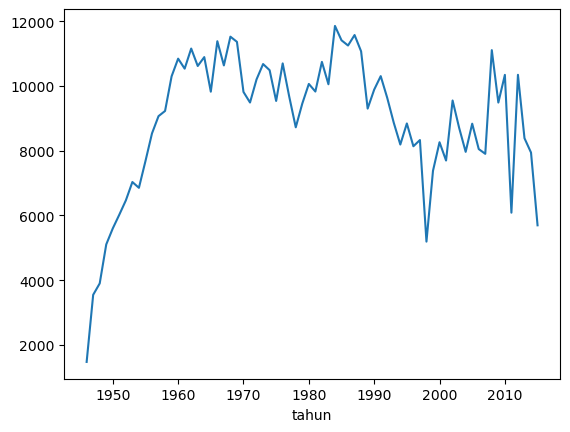

In [89]:
df_bos_pts_yearly.plot()

plot diatas menunjukkan trend total pts yang dicetak tim BOS dari tahun ke tahun (riil bukan season). kita bisa lihat kalau dari tahun 1940an sampai ke 1960 ada kenaikan banyak, tapi setelah itu lumayan naik turun, dan ada penurunan drastis di tahun 1998 dengan total pts 5190 saja.

dari https://en.wikipedia.org/wiki/1998%E2%80%9399_NBA_lockout#:~:text=The%20National%20Basketball%20Players%20Association,the%20owners%20began%20the%20lockout kita bisa berasumsi kalau di tahun tersebut jumlah games berkurang banyak sehingga total pts ikut berkurang.

mungkin lebih berarti kalau kita buat plot nya rata2 pts per game, bukan total pts dari semua game. untuk bisa melihat apakah tim ini makin jago/ tidak.

In [90]:
for i in df_bos_pts_yearly.index:
    print(i, df_bos_pts_yearly[i])

1946 1474
1947 3547
1948 3899
1949 5103
1950 5598
1951 6023
1952 6464
1953 7031
1954 6852
1955 7678
1956 8533
1957 9066
1958 9226
1959 10296
1960 10842
1961 10533
1962 11154
1963 10615
1964 10890
1965 9822
1966 11381
1967 10633
1968 11521
1969 11361
1970 9814
1971 9487
1972 10202
1973 10675
1974 10486
1975 9535
1976 10696
1977 9670
1978 8721
1979 9455
1980 10061
1981 9826
1982 10742
1983 10051
1984 11853
1985 11409
1986 11248
1987 11572
1988 11068
1989 9299
1990 9885
1991 10302
1992 9629
1993 8860
1994 8189
1995 8840
1996 8136
1997 8328
1998 5190
1999 7378
2000 8260
2001 7695
2002 9550
2003 8706
2004 7963
2005 8833
2006 8049
2007 7902
2008 11105
2009 9485
2010 10341
2011 6084
2012 10343
2013 8384
2014 7941
2015 5694


In [91]:
# kalau mau plot rata2 pts per game, dari tahun ke tahun
df_bos["pts"].mean()

104.46623311655829

In [92]:
df_bos_pts_mean_yearly = df_bos.groupby("tahun")["pts"].mean()
df_bos_pts_mean_yearly

tahun
1946    58.960000
1947    64.490909
1948    70.890909
1949    79.734375
1950    79.971429
          ...    
2011    95.062500
2012    92.348214
2013    95.272727
2014    99.262500
2015    99.894737
Name: pts, Length: 70, dtype: float64

<AxesSubplot:xlabel='tahun'>

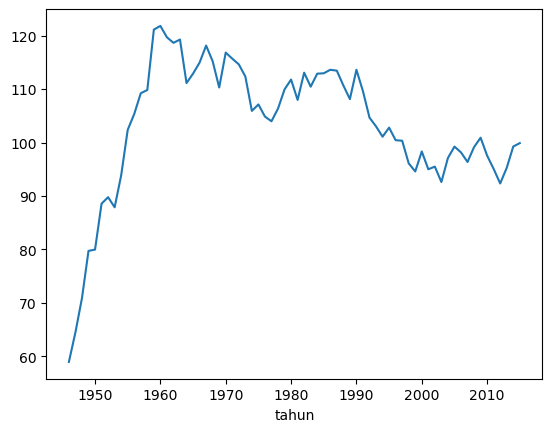

In [93]:
df_bos_pts_mean_yearly.plot()

kalau dari rata2 pts per game per tahun, sepertinya tim BOS sejak tahun 1960an semakin lemah, rata2 skor perlahan menurun. kita bisa coba bandingkan tredn rata2 pts per game per tahun dengan tim lain untuk cek apakah ini dikarenakan tim BOS makin lemah atau memang peraturan baru NBA membuat rata2 pts mentok di 100an.

In [94]:
# coba kita cek tim lain sebagai pembanding
df_nba2["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [95]:
# BOS NYK LAL
k1 = df_nba2["team_id"] == "BOS"
k2 = df_nba2["team_id"] == "NYK"
k3 = df_nba2["team_id"] == "LAL"

df_nba3 = df_nba2[k1 | k2 | k3]

# rata2 pts per game
df_nba3["pts"].mean()

# tambahin kolom tahun
df_nba3["tahun"] = df_nba3["date_game"].dt.year

# kita grup per tim per tahun
df_nba_3team_yearly = df_nba3.groupby(["team_id", "tahun"])[["pts"]].mean()
df_nba_3team_yearly


C:\Users\stefa\AppData\Local\Temp\ipykernel_11780\4282505216.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba3["tahun"] = df_nba3["date_game"].dt.year


pts
team_id tahun            
BOS     1946    58.960000
        1947    64.490909
        1948    70.890909
        1949    79.734375
        1950    79.971429
...                   ...
NYK     2011   104.120690
        2012    98.556701
        2013    96.085106
        2014    98.174419
        2015    90.312500

[196 rows x 1 columns]

<AxesSubplot:xlabel='team_id,tahun'>

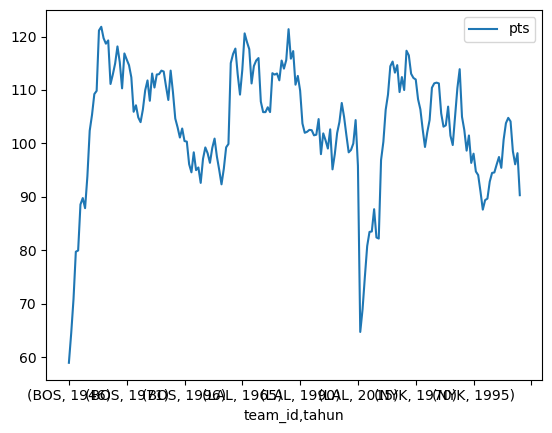

In [96]:
df_nba_3team_yearly.plot()

tidak bisa lsg di plot karena index nya campur semua, supaya index tidak campur2 kita pakai reset_index

In [97]:
df_nba_3team_yearly.reset_index()

,team_id,tahun,pts
0,BOS,1946,58.960000
1,BOS,1947,64.490909
2,BOS,1948,70.890909
3,BOS,1949,79.734375
4,BOS,1950,79.971429
...,...,...,...
191,NYK,2011,104.120690
192,NYK,2012,98.556701
193,NYK,2013,96.085106
194,NYK,2014,98.174419


<AxesSubplot:>

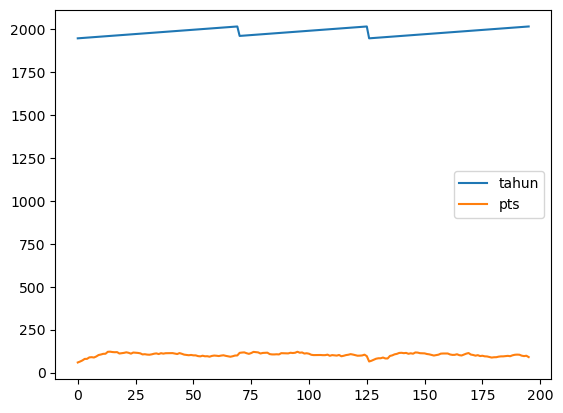

In [98]:
df_nba_3team_yearly.reset_index().plot()

tidak bisa langsung di plot, karena 1 kolom dianggap 1 garis data

In [99]:
df_bos_pts_mean_yearly

tahun
1946    58.960000
1947    64.490909
1948    70.890909
1949    79.734375
1950    79.971429
          ...    
2011    95.062500
2012    92.348214
2013    95.272727
2014    99.262500
2015    99.894737
Name: pts, Length: 70, dtype: float64

perhatikan, datanya 1 kolom dianggap 1 set data.

jadi untuk membandingkan 3 tim, kita perlu bentuk datanya menjadi 1 kolom adalah data milik 1 tim.

In [100]:
df_nba_3team_yearly = df_nba_3team_yearly.reset_index()
df_nba_3team_yearly

,team_id,tahun,pts
0,BOS,1946,58.960000
1,BOS,1947,64.490909
2,BOS,1948,70.890909
3,BOS,1949,79.734375
4,BOS,1950,79.971429
...,...,...,...
191,NYK,2011,104.120690
192,NYK,2012,98.556701
193,NYK,2013,96.085106
194,NYK,2014,98.174419


In [101]:
df_nba_bos_yearly = df_nba_3team_yearly[(df_nba_3team_yearly["team_id"] == "BOS")]
df_nba_nyk_yearly = df_nba_3team_yearly[(df_nba_3team_yearly["team_id"] == "NYK")]
df_nba_lal_yearly = df_nba_3team_yearly[(df_nba_3team_yearly["team_id"] == "LAL")]

df_nba_bos_yearly.head()

,team_id,tahun,pts
0,BOS,1946,58.960000
1,BOS,1947,64.490909
2,BOS,1948,70.890909
3,BOS,1949,79.734375
4,BOS,1950,79.971429


In [102]:
df_nba_bos_yearly =df_nba_bos_yearly.set_index("tahun")
df_nba_nyk_yearly = df_nba_nyk_yearly.set_index("tahun")
df_nba_lal_yearly = df_nba_lal_yearly.set_index("tahun")

df_nba_nyk_yearly.head()

,team_id,pts
tahun,,
1946,NYK,64.727273
1947,NYK,68.968254
1948,NYK,75.054545
1949,NYK,80.797297
1950,NYK,83.442857


kolom team_id nya kita hapus saja, judul "pts" kita ganti jadi nama team nya, baru kita gabungin 3 df jadi 1 lagi

In [103]:
df_nba_bos_yearly = df_nba_bos_yearly.drop(columns=["team_id"])
df_nba_nyk_yearly = df_nba_nyk_yearly.drop(columns=["team_id"])
df_nba_lal_yearly = df_nba_lal_yearly.drop(columns=["team_id"])

df_nba_lal_yearly.head()

,pts
tahun,
1960,115.026316
1961,116.734043
1962,117.741573
1963,112.923913
1964,109.129412


In [104]:
df_nba_bos_yearly = df_nba_bos_yearly.rename(columns={"pts":"BOS"})
df_nba_nyk_yearly = df_nba_nyk_yearly.rename(columns={"pts":"NYK"})
df_nba_lal_yearly = df_nba_lal_yearly.rename(columns={"pts":"LAL"})

In [105]:
display(df_nba_bos_yearly.head())
display(df_nba_nyk_yearly.head())
display(df_nba_lal_yearly.head())

,BOS
tahun,
1946,58.960000
1947,64.490909
1948,70.890909
1949,79.734375
1950,79.971429


,NYK
tahun,
1946,64.727273
1947,68.968254
1948,75.054545
1949,80.797297
1950,83.442857


,LAL
tahun,
1960,115.026316
1961,116.734043
1962,117.741573
1963,112.923913
1964,109.129412


In [122]:
# gunakan opsi axis=1 untuk merge on index (https://www.statology.org/pandas-merge-on-index/)
df_3team = pd.concat([df_nba_bos_yearly,df_nba_nyk_yearly,df_nba_lal_yearly], axis=1)
df_3team

,BOS,NYK,LAL
tahun,,,
1946,58.960000,64.727273,NaN
1947,64.490909,68.968254,NaN
1948,70.890909,75.054545,NaN
1949,79.734375,80.797297,NaN
1950,79.971429,83.442857,NaN
...,...,...,...
2011,95.062500,104.120690,98.328125
2012,92.348214,98.556701,98.776699
2013,95.272727,96.085106,99.988636


In [107]:
df_3team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1946 to 2015
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOS     70 non-null     float64
 1   NYK     70 non-null     float64
 2   LAL     56 non-null     float64
dtypes: float64(3)
memory usage: 6.1 KB


<AxesSubplot:xlabel='tahun'>

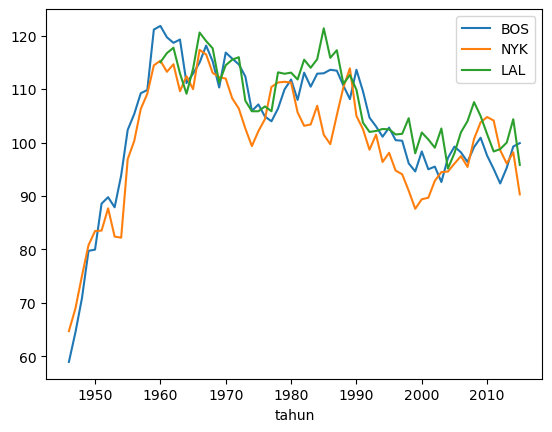

In [108]:
df_3team.plot()

3 tim yang paling banyak jumlah games nya memiliki trend rata2 pts per tahun yang mirip, naik terus sampai 1960an lalu stagnant dan bahkan sedikit menurun. sepertinya rata2 pts nya bukan karena tim nya makin lemah tapi karena peraturan baru NBA atau limitasi game NBA terbaru